In [171]:
%config IPCompleter.greedy=True

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [173]:
s2_data = pd.read_csv("scenario2_tests.csv")
s2_data

,n,slots
0,100,3
1,100,6
2,100,1
3,100,6
4,100,1
...,...,...
99995,10000,1
99996,10000,5
99997,10000,2
99998,10000,1


In [174]:
s3_data = pd.read_csv("scenario3_tests.csv")
s3_data

,u,n,slots,rounds
0,100,2,1,1
1,100,2,1,1
2,100,2,1,1
3,100,2,1,1
4,100,2,1,1
...,...,...,...,...
146995,4900,4900,12,1
146996,4900,4900,11,1
146997,4900,4900,12,1
146998,4900,4900,11,3


# Exercise 2

Dana jest zmienna losowa $L$, która oznacza liczbę slotów od rozpoczęcia algorytmu do momentu, w którym wybrano lidera. W tym zadaniu należało przeprowadzić testy dla obu scenariuszy - z zadaną dokładną liczbą węzłów  $n$ (**scenariusz drugi**) oraz z zadanym jedynie ograniczeniem na liczbę węzłów $u$ (**scenariusz trzeci**). Dla scenariusza trzeciego należało przyjąć wartości $n \in \{2, \frac{u}{2}, u\}$. W ramach zadania należało narysować histogramy prezętujące rozkład empiryczny zmiennej losowej $L$.

In [184]:
s3_summary = s3_data[27000:30000].groupby(['u', 'n', 'rounds']).agg(['value_counts'])
s3_summary

slots
                       value_counts
u    n    rounds slots             
1000 2    1      1              519
                 2              181
                 3               70
                 4               30
                 5               14
...                             ...
     1000 6      9                4
          7      10               5
                 9                1
          8      9                1
                 10               1

[67 rows x 1 columns]

array([<AxesSubplot:title={'center':'2'}, xlabel='u,rounds,slots'>,
       <AxesSubplot:title={'center':'500'}, xlabel='u,rounds,slots'>,
       <AxesSubplot:title={'center':'1000'}, xlabel='u,rounds,slots'>],
      dtype=object)

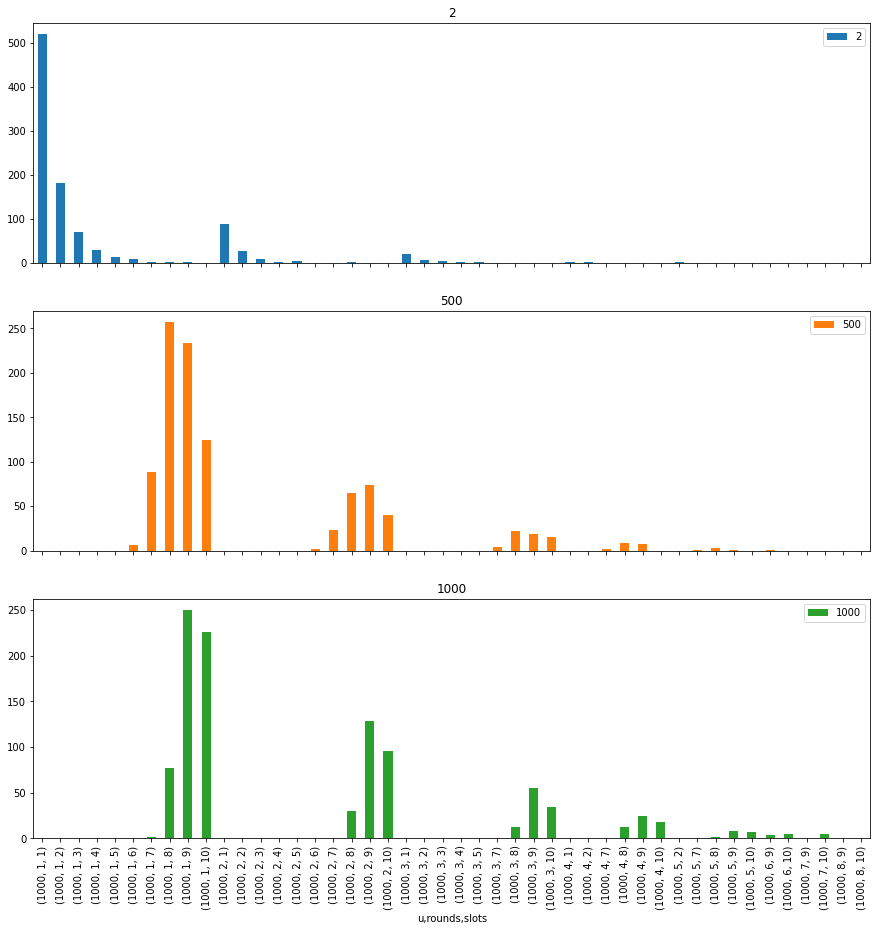

In [182]:
s3_summary['slots']['value_counts'].unstack(level=1).plot(kind='bar', subplots=True, figsize=(15,15))

Na powyższych wykresach zaprezentowano wyniki dla scneariusza **3**. Na histogramach zaprezentowano dane dla $u = 1000$, czyli $n \in \{2, 500, 1000\}$. Dla każdej _konfiguracji_ wykonano po 1000 powtórzeń.

Wiadomo, że zmienna $L$ pochodzi z rozkłądu geometrycznego, który opisuje prawdopodobieństwo otrzymania pierwszego sukcesu (wybór lidera) w $k$-tej próbie ($k$-ty slot).

Dla scenariusza trzeciego widzimy, że najlepsze wyniki otrzymujemy, gdy $n$ jest małe. Dla $n=2$ widać, że w znacznej części przypadków lidera udało się wybrać już w pierwszym slocie pierwszej rundy. Wraz ze wzrostem wartości $n$ wybór lidera znacznie się opóźnia i już dla $n = u$ prawdopodobieństwo wyboru lidera jest największe w _ostatnich_ slotach każdej z rund.

In [198]:
s2_summary = s2_data[9000:10000].groupby('n').agg(['value_counts'])
s2_summary

slots
           value_counts
n    slots             
1000 1              388
     2              249
     3              163
     4               70
     5               53
     6               27
     7               19
     8               10
     10               9
     9                7
     12               2
     11               1
     14               1
     16               1

<AxesSubplot:xlabel='slots'>

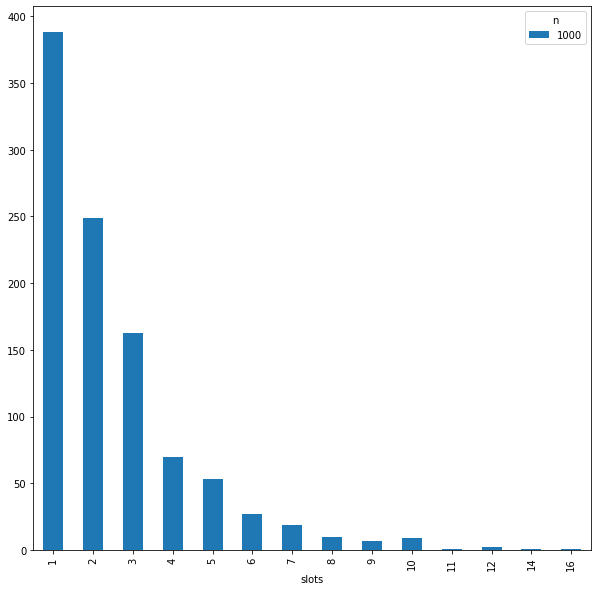

In [204]:
s2_summary['slots']['value_counts'].unstack(level=0).plot(kind='bar', figsize=(10,10))

Teraz przeanalizujmy wyniki dla scenariusza **drugiego**. Na histogramie powyżej zaprezentowano dane dla $n=1000$. Jeżeli każdy z węzłów nadawał z prawdopodobieństwem $p_i = \frac{1}{n}$ to możemy na wykresie zaobserwować, że, istotnie, zgodnie z lematem 1. takie $p_i$ maksymalizuje prawdopodobieństwo wyboru lidera w $i$-tym slocie.

# Exercise 3
W zadaniu trzecim rozważamy scenariusz ze znaną liczbą węzłów $n$ w systmie. Należało wyznaczyć $\mathbb{E}(L)$ oraz $\mathrm{Var}(L)$ i porównać z wynikami teoretycznymi z wykładu.

In [215]:
def compute_ex_var(data):
    return data.groupby('n').agg([np.mean, np.var])

In [218]:
n_100 = compute_ex_var(s2_data[0:1000])
n_500 = compute_ex_var(s2_data[4000:5000])
n_1000 = compute_ex_var(s2_data[9000:10000])

Poniżej zaprezentowano wyniki dla $n \in \{100, 500, 1000\}$, gdzie dla każdej wartości $n$ wykonano po $1000$ prób.

Dla przypomnienia $e \approx 2.718281828459$. Przy każdym $n$ zaprezentowano wyniki policzone zgodnie ze wzorami dostępnymi w materiałach do wykładu. Dla przypomnienia, jeżeli $L \backsim \mathrm{Gep}(q)$, to:

$\mathbb{E}(L) = 1/q$

$\mathrm{Var}(L) = \frac{1-q}{q^2}$

$q = P(X_i = 1) = (1 - \frac{1}{n})^{n-1}$

In [232]:
def th_ex_var(n):
    q = (1 - (1/n))**(n-1)
    ex = 1/q
    var = (1-q)/(q**2)
    return ex, var

## Wyniki

$n = 100$

In [235]:
ex_100, var_100 = th_ex_var(100)
print("E(L):", ex_100)
print("Var(L):", var_100)

n_100

E(L): 2.7046790361647384
Var(L): 4.610609652504279


slots          
      mean       var
n                   
100  2.696  4.319904

$n=500$

In [236]:
ex_500, var_500 = th_ex_var(500)
print("E(L):", ex_500)
print("Var(L):", var_500)

n_500

E(L): 2.7155630931300183
Var(L): 4.658719819639854


slots          
      mean       var
n                   
500  2.617  4.046357

$n=1000$

In [237]:
ex_1000, var_1000 = th_ex_var(1000)
print("E(L):", ex_1000)
print("Var(L):", var_1000)

n_1000

E(L): 2.7169225742264103
Var(L): 4.664745700114653


slots          
       mean       var
n                    
1000  2.513  3.855687

Widzimy, że zgodnie wyniki uzyskane eksperymentalnie są zbliżone do teoretycznych wartości. Ponadto ograniczenie z lematu 2. $\mathbb{E}(L) < e$ zachodzi.

# Exercise 4

W tym zadaniu należało ponownie rozważyć scenariusz, w którym znamy górne ograniczenie $u$. Z wykładu wiemy, że $S_{L, n}$ oznacza zdarzenie, że w jednej rundzie algorymu długości $L = \lceil \log_2 u \rceil $ udało się wybrać lidera, gdy w całym systemie było $n$ węzłów.

Celem zadania było ekperymentalne pokazanie, że wprowadzone w materiałach do wykładu ogranicznie $\mathrm{Pr}[S_{L,n}] \geq \lambda \approx 0.579$ (Twierdzenie 1.).

Eksperyment polegał na policzeniu liczby rund potrzebnych do wyznaczenia lidera oraz liczby slotów użytych w rundzie, w której dokonano z sukcesem wyboru. Samą wartość $\mathrm{Pr}[S_{L, n}]$ definiujemy wówczas jako iloraz liczby _pierwszych_ rund oraz liczby eksperymentów. Dla każej kombinacji $n$ i $u$ wykonanko po $1000$ prób.

In [298]:
pr_100 = s3_data[0:3000].groupby(['u', 'n', 'rounds']).agg(['count'])
pr_100['slots']['count'].unstack()[1].div(1000)

u    n  
100  2      0.805
     50     0.736
     100    0.637
Name: 1, dtype: float64

Dla $u = 100$ i $n \in \{2, \frac{u}{2}, u\}$ widzimy, że istotnie, wartości uzyskane w ekspryemencie są większe od $\lambda$ i do niej zbiegają. 

Sprawdźmy jeszcze dla $u=500$ i podobny wartości dla $n$.

In [300]:
pr_500 = s3_data[12000:15000].groupby(['u', 'n', 'rounds']).agg(['count'])
pr_500['slots']['count'].unstack()[1].div(1000)

u    n  
500  2      0.818
     250    0.707
     500    0.589
Name: 1, dtype: float64